In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Zadanie 1: Regresja jednowymiarowa dla f(x) = cos(x^2)
# Generowanie danych
X = np.linspace(1, 3, 100).reshape(-1, 1)
y = np.cos(X**2)

# Normalizacja danych
X_mean, X_std = X.mean(), X.std()
X = (X - X_mean) / X_std

In [17]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definiowanie modelu
model = MLPRegressor(hidden_layer_sizes=(64, 64, 32), activation='tanh', solver='adam', alpha=0.001, max_iter=5000, random_state=42)

In [18]:
# Trening modelu
model.fit(X_train, y_train.ravel())

MLPRegressor(activation='tanh', alpha=0.001, hidden_layer_sizes=(64, 64, 32),
             max_iter=5000, random_state=42)

In [19]:
# Predykcja
y_pred = model.predict(X_test)

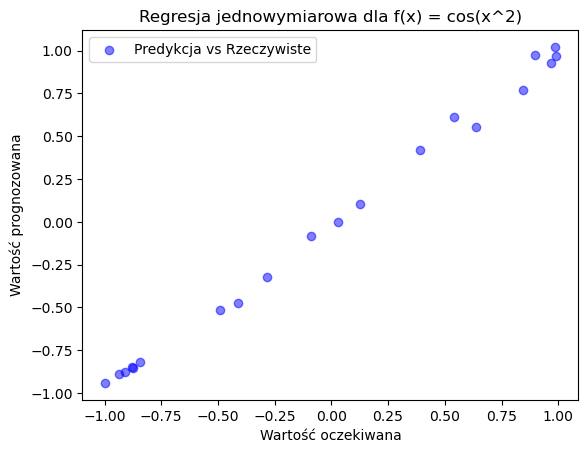

In [20]:
# Wykres wyników
plt.scatter(y_test, y_pred, label='Predykcja vs Rzeczywiste', color='blue', alpha=0.5)
plt.xlabel('Wartość oczekiwana')
plt.ylabel('Wartość prognozowana')
plt.title('Regresja jednowymiarowa dla f(x) = cos(x^2)')
plt.legend()
plt.show()

In [21]:
# Sprawdzenie błędu
final_loss = mean_squared_error(y_test, y_pred)
print(f'Finalny błąd (MSE): {final_loss:.5f}')

Finalny błąd (MSE): 0.00215


In [33]:
# Zadanie 2: Prognozowanie wzrostu i wagi dzieci
# Generacja danych
X = np.random.rand(1000, 4) * [18, 3000, 5, 1]  # wiek, kalorie, aktywność, genetyka
y = X @ np.array([[10], [0.05], [5], [20]]) + np.random.randn(1000, 2) * [10, 5]  # wzrost i masa ciała

# Normalizacja danych
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std
y_mean, y_std = y.mean(axis=0), y.std(axis=0)
y = (y - y_mean) / y_std

In [34]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Definiowanie modelu
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.01, max_iter=5000, random_state=42)

In [36]:
# Trening modelu
model.fit(X_train, y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(64, 32), max_iter=5000,
             random_state=42)

In [37]:
# Sprawdzenie błędu
y_pred = model.predict(X_test)
final_loss = mean_squared_error(y_test, y_pred)
print(f'Finalny błąd (MSE) dla wzrostu i masy ciała: {final_loss:.5f}')

Finalny błąd (MSE) dla wzrostu i masy ciała: 0.01596


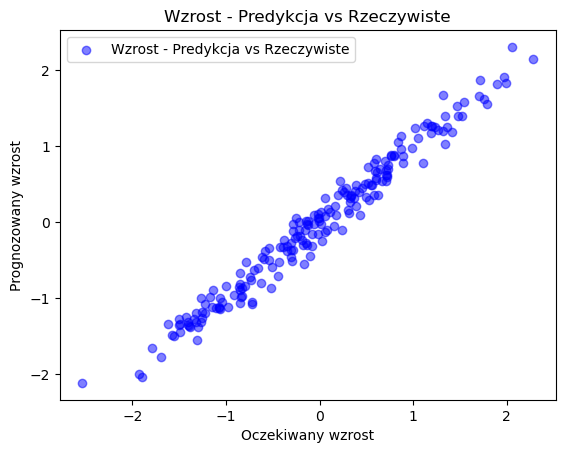

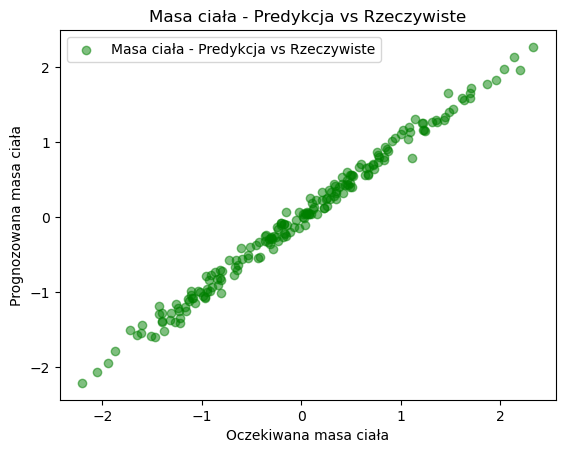

In [38]:
# Wyświetlenie wykresów dla wzrostu i wagi
plt.scatter(y_test[:, 0], y_pred[:, 0], label='Wzrost - Predykcja vs Rzeczywiste', color='blue', alpha=0.5)
plt.xlabel('Oczekiwany wzrost')
plt.ylabel('Prognozowany wzrost')
plt.title('Wzrost - Predykcja vs Rzeczywiste')
plt.legend()
plt.show()

plt.scatter(y_test[:, 1], y_pred[:, 1], label='Masa ciała - Predykcja vs Rzeczywiste', color='green', alpha=0.5)
plt.xlabel('Oczekiwana masa ciała')
plt.ylabel('Prognozowana masa ciała')
plt.title('Masa ciała - Predykcja vs Rzeczywiste')
plt.legend()
plt.show()